In [1]:
import re

In [2]:
with open('LangId.train.French', 'r', encoding='UTF-8', errors='ignore') as f:
    data_french = f.read()
    print(len(data_french))


491611


In [3]:
with open('LangId.train.Italian', 'r', encoding='UTF-8', errors='ignore') as f:
    data_italian = f.read()
    print(len(data_italian))


491892


In [4]:
with open('LangId.train.English', 'r', encoding='UTF-8', errors='ignore') as f:
    data_english = f.read()
    print(len(data_english))


452144


## Problem 1: generate letter based ngram

In [5]:
data = data_english
n=2

In [6]:
clean_data = " " + " ".join(re.findall("[a-zA-Z]+", data.lower())) + " "

In [7]:
from itertools import product
from string import ascii_lowercase
keywords = [''.join(i) for i in product(ascii_lowercase+" ", repeat = n)]

In [8]:
# I have to admit my coding here is really elegant
ngram  =  dict.fromkeys(keywords, 0)

for i in range(0, len(clean_data)-1):
    ngram[clean_data[i:i+2]] += 1
    
import collections

letter_count = collections.Counter(clean_data)

ngram = {i : ngram[i]/letter_count[i[0]] for i in ngram}

In [9]:
len([i for i in ngram if ngram[i] == 0])

211

In [10]:
len(ngram)

729

In [11]:
min([ngram[i] for i in ngram if ngram[i] != 0])

2.7976723366159355e-05

In [12]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

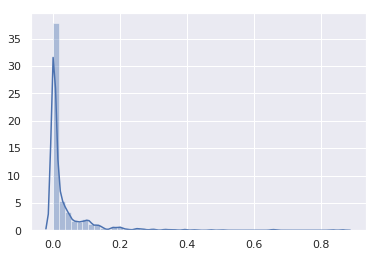

In [13]:
sns.set()
sns.distplot(list(ngram.values()))

I dont think we need smoothing because letter combinations are easily covered. This distribution also makes sense. only 211/729 didn't occur in the ngram model. 

Based on the observations we can define the function.

In [14]:
from itertools import product
from string import ascii_lowercase
import collections

def get_letter_ngram(data,n):
    clean_data = " " + " ".join(re.findall("[a-zA-Z]+", data.lower())) + " "
    keywords = [''.join(i) for i in product(ascii_lowercase+" ", repeat = n)]
    ngram  =  dict.fromkeys(keywords, 0)

    for i in range(0, len(clean_data)-1):
        ngram[clean_data[i:i+2]] += 1
        
    letter_count = collections.Counter(clean_data)

    return {i : ngram[i]/letter_count[i[0]] for i in ngram}

In [15]:
english_ngram = get_letter_ngram(data_english,2)
italian_ngram = get_letter_ngram(data_italian,2)
french_ngram = get_letter_ngram(data_french,2)

In [16]:
ngram_dict = {"English":english_ngram, "Italian":italian_ngram, "French":french_ngram}

lets do the prediction code now

In [17]:
with open('LangId.test', 'r', encoding='UTF-8', errors='ignore') as f:
    data_test= f.read()

In [18]:
def assign_letter_ngram(data,n,ngram_dict):
    result = []
    for index, sentence in enumerate(data_test.strip().split("\n")):
        sentence = " " + " ".join(re.findall("[a-zA-Z]+", sentence.lower())) + " "
        p = {i:1 for i in ngram_dict.keys()}
        for language in ngram_dict.keys():
            for i in range(0,len(sentence)- n + 1):
                p[language] *= ngram_dict[language][sentence[i:i+n]]
        result.append(str(index+1) + " " + max(p, key = p.get))
    with open("letterLangId.out","w") as f:
        f.write("\n".join(result))
    return result

In [19]:
result = assign_letter_ngram(data_test,2,ngram_dict)

In [20]:
with open('LangId.sol', 'r', encoding='UTF-8', errors='ignore') as f:
    solution = f.read()

In [21]:
import pandas as pd
def check_solution(output, solution):
    col = ["predicted_" + i for i in ngram_dict.keys()]
    index = ["true_" + i for i in ngram_dict.keys()]
    compare = pd.DataFrame(columns=col,index=index)
    compare = compare.fillna(0)
    for i in range(len(output)):
        compare.at["true_" + solution[i].split(" ")[1], "predicted_" + output[i].split(" ")[1]] += 1
    return compare

In [22]:
check_solution(result, solution.strip().split("\n"))

,predicted_Italian,predicted_English,predicted_French
true_Italian,97,0,3
true_English,9,91,0
true_French,14,1,85
